<a href="https://colab.research.google.com/github/raksasatidor/Day2_AINusantara/blob/main/day2_ainusantara_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#hyperparameters
input_size = 784
hidden_size = 64
output_size = 10
learning_rate = 0.001
batch_size = 64
epochs = 10

In [3]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15929208.19it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 537683.07it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3661613.81it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3785876.15it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
# Visualize some training data
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.title(title)
    plt.show()

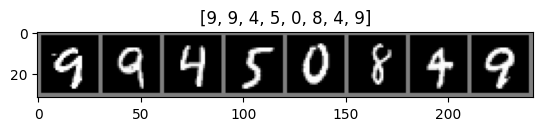

In [5]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:8], nrow=8), title=[labels[j].item() for j in range(8)])

In [6]:
# Define the neural network
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, input_size)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [7]:
# Instantiate the model, define loss function and optimizer
model = SimpleMLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
# Training the model
train_losses = []
test_accuracies = []

In [9]:
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss:.4f}')

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)
    print(f'Test Accuracy: {accuracy:.2f}%')

Epoch [1/10], Loss: 0.4270
Test Accuracy: 92.68%
Epoch [2/10], Loss: 0.2425
Test Accuracy: 94.20%
Epoch [3/10], Loss: 0.1864
Test Accuracy: 94.79%
Epoch [4/10], Loss: 0.1574
Test Accuracy: 95.43%
Epoch [5/10], Loss: 0.1385
Test Accuracy: 95.96%
Epoch [6/10], Loss: 0.1256
Test Accuracy: 95.84%
Epoch [7/10], Loss: 0.1148
Test Accuracy: 95.96%
Epoch [8/10], Loss: 0.1042
Test Accuracy: 96.61%
Epoch [9/10], Loss: 0.0976
Test Accuracy: 96.45%
Epoch [10/10], Loss: 0.0927
Test Accuracy: 96.64%


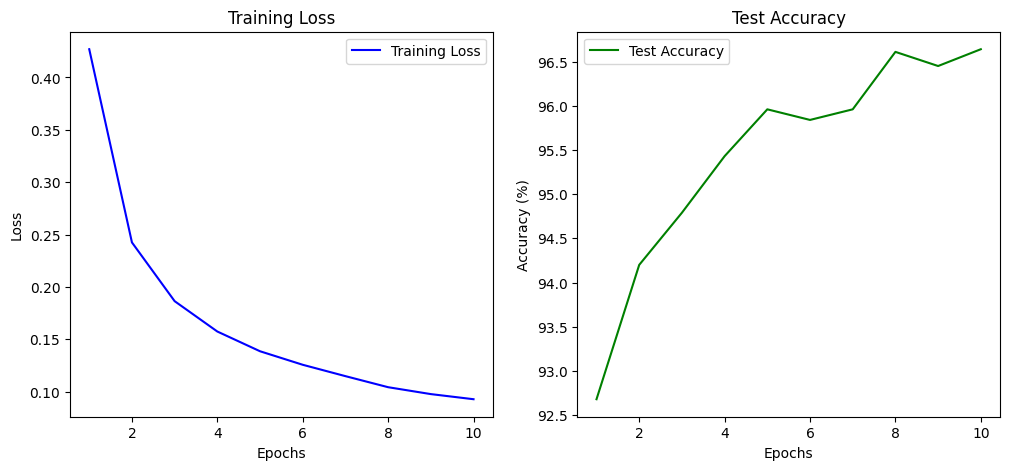

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, 'b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, 'g', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()

plt.show()

In [11]:
# Visualize some test data with predictions
dataiter = iter(test_loader)

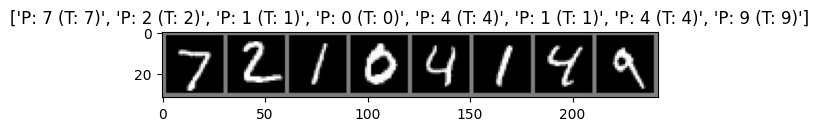

In [12]:
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images[:8], nrow=8), title=[f'P: {predicted[j].item()} (T: {labels[j].item()})' for j in range(8)])